## **Predictive Analytics**

---
### Importing Libraries

In [1]:
#importing libraries we need for the task
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pickle
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler

---
### Data Preparation

In [2]:
# loading the dataset

df = pd.read_csv("diabetes_clean.csv")
df.dtypes

encounter_id                  int64
patient_nbr                   int64
race                         object
gender                       object
age                          object
admission_type_id             int64
discharge_disposition_id      int64
admission_source_id           int64
time_in_hospital              int64
num_lab_procedures            int64
num_procedures                int64
num_medications               int64
number_outpatient             int64
number_emergency              int64
number_inpatient              int64
diag_1                       object
diag_2                       object
diag_3                       object
number_diagnoses              int64
metformin                    object
repaglinide                  object
nateglinide                  object
chlorpropamide               object
glimepiride                  object
acetohexamide                object
glipizide                    object
glyburide                    object
tolbutamide                 

In [3]:
# assigning data types
categorical_columns = ['race', 'gender', 'age', 'diag_1', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id','diag_2', 'diag_3', 'metformin', 'repaglinide', 
                       'nateglinide', 'chlorpropamide', 'glimepiride','acetohexamide', 'glipizide', 
                       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone','acarbose', 
                       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin',
                       'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone',
                       'metformin-rosiglitazone','metformin-pioglitazone', 'change', 'diabetesMed',
                       'readmitted', 'max_glu_serum_transformed', 'A1Cresult_transformed']
df[categorical_columns] = df[categorical_columns].astype('category')

df.dtypes

encounter_id                    int64
patient_nbr                     int64
race                         category
gender                       category
age                          category
admission_type_id            category
discharge_disposition_id     category
admission_source_id          category
time_in_hospital                int64
num_lab_procedures              int64
num_procedures                  int64
num_medications                 int64
number_outpatient               int64
number_emergency                int64
number_inpatient                int64
diag_1                       category
diag_2                       category
diag_3                       category
number_diagnoses                int64
metformin                    category
repaglinide                  category
nateglinide                  category
chlorpropamide               category
glimepiride                  category
acetohexamide                category
glipizide                    category
glyburide   

In [4]:
# binarizing the target variable and dropping the original

df['readmitted_binary'] = df['readmitted'].apply(lambda x: 0 if x == 'NO' else 1)
df2 = df.drop(axis=1, columns='readmitted')
df2.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,max_glu_serum_transformed,A1Cresult_transformed,readmitted_binary
0,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,No,No,No,No,Ch,Yes,Not measured,Not measured,1
1,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,Yes,Not measured,Not measured,0
2,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,No,No,No,No,No,Ch,Yes,Not measured,Not measured,0
3,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,No,No,No,No,No,Ch,Yes,Not measured,Not measured,0
4,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,...,No,No,No,No,No,No,Yes,Not measured,Not measured,1


In [5]:
# choosing to work on a sample data due to computational power issues 
sampled_data = df2.sample(frac=0.3, random_state=42) 
sampled_data

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,max_glu_serum_transformed,A1Cresult_transformed,readmitted_binary
68448,205329768,82604862,Caucasian,Male,[50-60),1,1,7,5,75,...,No,No,No,No,No,Ch,Yes,Not measured,Normal,0
75809,240725442,39494412,Caucasian,Male,[90-100),1,1,7,2,1,...,No,No,No,No,No,No,Yes,Not measured,Not measured,1
92012,362648216,89982864,Caucasian,Female,[60-70),2,3,1,7,31,...,No,No,No,No,No,Ch,Yes,Not measured,Not measured,0
81282,265891380,89952462,Caucasian,Female,[40-50),1,1,7,4,43,...,No,No,No,No,No,No,No,Not measured,Not measured,1
14051,57119142,3277926,Caucasian,Female,[60-70),1,1,7,3,59,...,No,No,No,No,No,No,No,Not measured,Not measured,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36367,119737542,37045620,Caucasian,Male,[60-70),2,1,7,8,29,...,No,No,No,No,No,Ch,Yes,Not measured,Not measured,0
7343,36079062,3807567,AfricanAmerican,Female,[60-70),1,1,7,3,43,...,No,No,No,No,No,No,No,Not measured,Not measured,1
12668,53046516,76789008,Caucasian,Male,[60-70),1,6,7,5,66,...,No,No,No,No,No,Ch,Yes,Not measured,Not measured,1
36369,119739600,113007978,Hispanic,Female,[40-50),1,1,7,3,32,...,No,No,No,No,No,Ch,Yes,Not measured,Not measured,0


**Feature Selection:** Since the feature importance test did not show strong correlations between the features and the target variable to be predicted, we decided to use domain knowledge and include medically meaningful features that could affect diabetes control such as age, HbA1C, maximum glucose levels, type of medication, race, gender, receiving antidiabetic medications, number of medications and change in the medication plan. Also, other features related to the patient's hospital visit were included which are time spent in hospital, number of lab procedures, and number of procedures performed in the hospital.

In [6]:


# Extracting the columns to be ordinally encoded
df_ordinal = sampled_data[['age','max_glu_serum_transformed', 'A1Cresult_transformed']]


# Defining the categories for each column explicitly
cats = {
    'age': ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100)'],
    'max_glu_serum_transformed': ['Not measured', 'Normal', 'Elevated', 'High'],
    'A1Cresult_transformed': ['Not measured', 'Normal', 'High']
}

for col in df_ordinal.columns:
    df_ordinal[col] = pd.Categorical(df_ordinal[col], categories=cats[col], ordered=True)
    df_ordinal[col] = df_ordinal[col].cat.codes


df_ordinal

C:\Users\munas\AppData\Local\Temp\ipykernel_9932\3115279112.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ordinal[col] = pd.Categorical(df_ordinal[col], categories=cats[col], ordered=True)
C:\Users\munas\AppData\Local\Temp\ipykernel_9932\3115279112.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ordinal[col] = df_ordinal[col].cat.codes


,age,max_glu_serum_transformed,A1Cresult_transformed
68448,5,0,1
75809,9,0,0
92012,6,0,0
81282,4,0,0
14051,6,0,0
...,...,...,...
36367,6,0,0
7343,6,0,0
12668,6,0,0
36369,4,0,0


In [7]:
# grouping the medications according to their pharmacological properties 
med = ['metformin', 'repaglinide','nateglinide', 'chlorpropamide', 'glimepiride','acetohexamide', 'glipizide', 
                       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone','acarbose', 
                       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin',
                       'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone',
                       'metformin-rosiglitazone','metformin-pioglitazone']
med_df = sampled_data[med]

for med in med_df:
    med_df[med] = med_df[med].apply(lambda x: 0 if x == 'No' else 1)

med_df['SU'] = med_df[['chlorpropamide', 'glimepiride','acetohexamide', 'glipizide', 
                       'glyburide', 'tolbutamide', 'tolazamide']].max(axis=1)
med_df[' meglitinides'] = med_df[['repaglinide','nateglinide']].max(axis=1)
med_df['thiazolidinediones'] = med_df[['pioglitazone', 'rosiglitazone','troglitazone']].max(axis=1)
med_df['glucosidase_inh'] = med_df[['acarbose','miglitol']].max(axis=1)
med_df.drop(axis=1,columns=['chlorpropamide', 'glimepiride','acetohexamide', 'glipizide', 
                       'glyburide', 'tolbutamide', 'tolazamide','repaglinide','nateglinide','pioglitazone', 'rosiglitazone',
                       'acarbose','miglitol','troglitazone'],inplace=True)
column_names = med_df.columns.tolist()
print(column_names)
med_df

['metformin', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'SU', ' meglitinides', 'thiazolidinediones', 'glucosidase_inh']


C:\Users\munas\AppData\Local\Temp\ipykernel_9932\1848147426.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  med_df[med] = med_df[med].apply(lambda x: 0 if x == 'No' else 1)
C:\Users\munas\AppData\Local\Temp\ipykernel_9932\1848147426.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  med_df['SU'] = med_df[['chlorpropamide', 'glimepiride','acetohexamide', 'glipizide',
C:\Users\munas\AppData\Local\Temp\ipykernel_9932\1848147426.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

,metformin,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,SU,meglitinides,thiazolidinediones,glucosidase_inh
68448,0,0,0,0,0,0,0,0,0,1,0,0,0
75809,0,0,0,1,0,0,0,0,0,0,0,0,0
92012,0,0,0,0,0,0,0,0,0,1,0,0,0
81282,0,0,0,0,0,0,0,0,0,0,0,0,0
14051,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36367,0,0,0,1,0,0,0,0,0,0,0,1,0
7343,0,0,0,0,0,0,0,0,0,0,0,0,0
12668,0,0,0,1,0,0,0,0,0,0,0,0,0
36369,1,0,0,0,0,0,0,0,0,0,0,1,0


In [8]:
# choosing numerical features to be included in the task
num_f = sampled_data[['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications']]

# one-hot encoding of nominal features chosen for the task
nominal_f = sampled_data[['race', 'gender','change', 'diabetesMed']]
oh_nominal = pd.get_dummies(nominal_f)
oh_nominal

,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Female,gender_Male,gender_Unknown/Invalid,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes
68448,False,False,True,False,False,False,True,False,True,False,False,True
75809,False,False,True,False,False,False,True,False,False,True,False,True
92012,False,False,True,False,False,True,False,False,True,False,False,True
81282,False,False,True,False,False,True,False,False,False,True,True,False
14051,False,False,True,False,False,True,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
36367,False,False,True,False,False,False,True,False,True,False,False,True
7343,True,False,False,False,False,True,False,False,False,True,True,False
12668,False,False,True,False,False,False,True,False,True,False,False,True
36369,False,False,False,True,False,True,False,False,True,False,False,True


In [9]:
# concatenating the four DataFrames together 
X_sample = pd.concat([oh_nominal,num_f,med_df,df_ordinal],axis=1)
X_sample.head()

,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Female,gender_Male,gender_Unknown/Invalid,change_Ch,change_No,...,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,SU,meglitinides,thiazolidinediones,glucosidase_inh,age,max_glu_serum_transformed,A1Cresult_transformed
68448,False,False,True,False,False,False,True,False,True,False,...,0,0,0,1,0,0,0,5,0,1
75809,False,False,True,False,False,False,True,False,False,True,...,0,0,0,0,0,0,0,9,0,0
92012,False,False,True,False,False,True,False,False,True,False,...,0,0,0,1,0,0,0,6,0,0
81282,False,False,True,False,False,True,False,False,False,True,...,0,0,0,0,0,0,0,4,0,0
14051,False,False,True,False,False,True,False,False,False,True,...,0,0,0,0,0,0,0,6,0,0


In [10]:
# retrieving numpy arrays so that the classifiers can accept them as input and output 
X_array = X_sample.values
y = sampled_data['readmitted_binary'].values

print(X_array)
print(y)

[[False False True ... 5 0 1]
 [False False True ... 9 0 0]
 [False False True ... 6 0 0]
 ...
 [False False True ... 6 0 0]
 [False False False ... 4 0 0]
 [True False False ... 6 0 0]]
[0 1 0 ... 1 0 1]


(array([15622., 13794.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

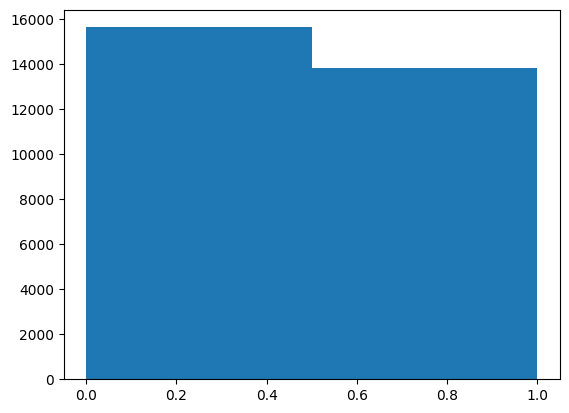

In [11]:
# checking target class balance
plt.hist(sampled_data['readmitted_binary'],bins=2) 

In [12]:
# normalizing data

scaler = MinMaxScaler()

X_normalized = scaler.fit_transform(X_array)

# splitting into training and test sets
RANDOM_SEED = 2023

X_train, X_test, y_train, y_test = train_test_split(X_normalized,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=RANDOM_SEED,
                                                    stratify=y) 
# Check the shapes of train and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (23532, 32)
Shape of X_test: (5884, 32)
Shape of y_train: (23532,)
Shape of y_test: (5884,)


---
### Training Models

In [13]:
# importing classifiers  

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier


In [14]:
# creating a dictionary of classifiers to evaluate
 
models = {
    "DT3": DecisionTreeClassifier(max_depth=3,random_state=RANDOM_SEED),
    "DT30": DecisionTreeClassifier(max_depth=30,random_state=RANDOM_SEED),
    "RF3": RandomForestClassifier(n_estimators=100, max_depth=3,random_state=RANDOM_SEED),
    "RF30": RandomForestClassifier(n_estimators=100, max_depth=30,random_state=RANDOM_SEED),
    "KNN3": KNeighborsClassifier(n_neighbors=3),
    "KNN25": KNeighborsClassifier(n_neighbors=25),
    "SVM_linear": SVC(kernel='linear'),
    "SGD": SGDClassifier(loss='modified_huber'),
    "GNB": GaussianNB(),
    "HGB":HistGradientBoostingClassifier(random_state=RANDOM_SEED),
    "MLP_2lay": MLPClassifier(hidden_layer_sizes=(200,200))
     }

In [15]:
#importing performance metrics

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import time

In [16]:
# creating a dataframe to store the results of the performance 
results = pd.DataFrame({
                        "classifier_name": [],
                        "training_time": [],
                        "prediction_time": [],
                        "accuracy": [],
                        "precision": [],
                        "recall": [],
                        "f1": []
                        })

In [17]:
# preparing the models and getting their performances

for name, classifier in models.items():

    # Start measuring the training time
    t_start = time.time()
    # The code below applies the specific classifier from the loop on the data
    classifier.fit(X_train,y_train)
    # Stop measuring training time
    t_end = time.time()
    # Calculate Variable of interest `training_time`
    training_time = t_end - t_start
    #######

    # Start measuring the prediction time
    t_start = time.time()
    # Predict on test set
    y_predicted = classifier.predict(X_test)
    # Stop measuring prediction time
    t_end = time.time()
    # Calculate Variable of interest `prediction_time`
    prediction_time = t_end - t_start

     # Get performance metrics
    accuracy_result = accuracy_score(y_test, y_predicted)
    precision_result = precision_score(y_test, y_predicted)
    recall_result = recall_score(y_test, y_predicted)
    f1_result = f1_score(y_test, y_predicted)
    #######


    #### Generate the results to populate the pandas.DataFrame
    this_result = pd.DataFrame({
                    "classifier_name": [name],
                    "training_time": [training_time],
                    "prediction_time": [prediction_time],
                    "accuracy": [accuracy_result],
                    "precision": [precision_result],
                    "recall": [recall_result],
                    "f1": [f1_result]
                    })
    # Append to the main dataframe with the results
    results = pd.concat([results, this_result], axis=0, ignore_index=True)

c:\Users\munas\Desktop\GlucoGuard_Analytics\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [18]:
# showing the performance metrics 
results

,classifier_name,training_time,prediction_time,accuracy,precision,recall,f1
0,DT3,0.498174,0.021435,0.565432,0.558449,0.349764,0.430131
1,DT30,0.345156,0.005181,0.506628,0.474230,0.480246,0.477220
2,RF3,1.222098,0.047999,0.544358,0.564356,0.123958,0.203269
3,RF30,5.729682,0.324396,0.543168,0.514910,0.444364,0.477043
4,KNN3,0.004375,2.294099,0.532631,0.501653,0.495107,0.498358
5,KNN25,0.005262,1.049912,0.550986,0.524590,0.452338,0.485792
6,SVM_linear,51.199149,7.150743,0.547247,0.528291,0.321493,0.399730
7,SGD,0.814703,0.086163,0.548097,0.531056,0.309895,0.391394
8,GNB,0.025906,0.008284,0.535860,0.525455,0.104748,0.174675
9,HGB,0.818038,0.030329,0.575799,0.563619,0.422254,0.482801


In [19]:
# grouping by the classifier name to prepare for the visualization


results = results.groupby(by=["classifier_name"]).first()

results

,training_time,prediction_time,accuracy,precision,recall,f1
classifier_name,,,,,,
DT3,0.498174,0.021435,0.565432,0.558449,0.349764,0.430131
DT30,0.345156,0.005181,0.506628,0.474230,0.480246,0.477220
GNB,0.025906,0.008284,0.535860,0.525455,0.104748,0.174675
HGB,0.818038,0.030329,0.575799,0.563619,0.422254,0.482801
KNN25,0.005262,1.049912,0.550986,0.524590,0.452338,0.485792
KNN3,0.004375,2.294099,0.532631,0.501653,0.495107,0.498358
MLP_2lay,205.567171,0.178813,0.530082,0.498916,0.500544,0.499729
RF3,1.222098,0.047999,0.544358,0.564356,0.123958,0.203269
RF30,5.729682,0.324396,0.543168,0.514910,0.444364,0.477043


<Figure size 3000x2000 with 0 Axes>

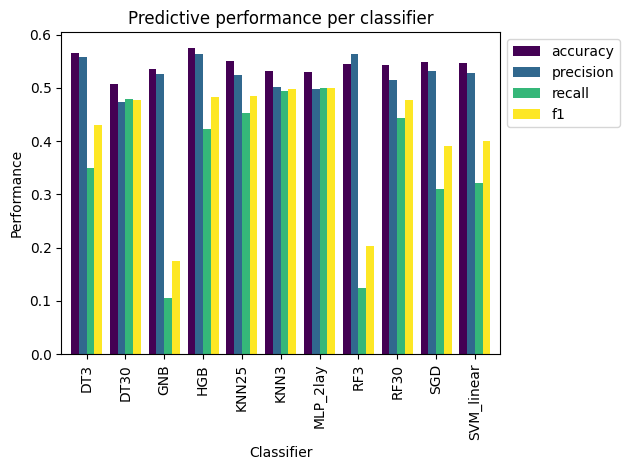

In [20]:
# Selecting columns related to performance
cols_performance = ["accuracy","precision","recall","f1"]
# Increasing the width of the figure
plt.figure(figsize=(30,20))
ax=results[cols_performance].plot.bar(
    width=0.8, 
    cmap="viridis"
    )

# Main labels when there are subplots
plt.title("Predictive performance per classifier")
plt.xlabel("Classifier")
plt.ylabel("Performance")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()  
plt.show()

**Choosing a Classifier:** All classifiers had unsatisfactory performance. However, the HistGradientBoostingClassifier() achieved slightly better than the rest and had faster prediction time compared to similarly performing classifiers. So, this classifier will be used for the dashboard after trying to optimize its performance using the GridSearch.

---
### Model Tuning

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
HGB = HistGradientBoostingClassifier(random_state=RANDOM_SEED)

# Define the hyperparameters to tune
param_grid = {
    'max_iter': [100,200],
    'max_leaf_nodes': [40,100],
    'max_depth': [10,20],
}

# Define the scoring metrics
scoring = {
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'),
    'f1': make_scorer(f1_score, average='macro'),
    'accuracy': make_scorer(accuracy_score)
}

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=HGB, param_grid=param_grid, scoring=scoring, refit='f1', cv=3, return_train_score=True)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best hyperparameters for HGB:", grid_search.best_params_)

# Predict on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model using different metrics
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Accuracy: {accuracy}')

Best hyperparameters for HGB: {'max_depth': 10, 'max_iter': 100, 'max_leaf_nodes': 40}
Precision: 0.5707046367824162
Recall: 0.5669264516129032
F1 Score: 0.5642184791198607
Accuracy: 0.5740992522093814


**Best Hyperparameters**: HistGradientBoostingClassifier('max_depth': 10, 'max_iter': 100, 'max_leaf_nodes': 40)

Input features: Categorical ordinal: ['age','max_glu_serum_transformed', 'A1Cresult_transformed']

Categorical nominal: ['race', 'gender','change', 'diabetesMed', Medications:['metformin','examide','citoglipton', 'insulin','glyburide-metformin','glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone','SU', 'meglitinides','thiazolidinediones','glucosidase_inh'] ]

Numerical: ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications']
                
Output target: 'Readmitted_binary'

---
### Training the Selected Model and Saving it 

In [22]:
# Binarizing the target variable and dropping the original
df['readmitted_binary'] = df['readmitted'].apply(lambda x: 0 if x == 'NO' else 1)
df2 = df.drop(axis=1, columns='readmitted')

# Ordinal encoding for specific features
df_ordinal = df2[['age', 'max_glu_serum_transformed', 'A1Cresult_transformed']]
cats = {
    'age': ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', 
            '[60-70)', '[70-80)', '[80-90)', '[90-100)'],
    'max_glu_serum_transformed': ['Not measured', 'Normal', 'Elevated', 'High'],
    'A1Cresult_transformed': ['Not measured', 'Normal', 'High']
}
for col in df_ordinal.columns:
    df_ordinal[col] = pd.Categorical(df_ordinal[col], categories=cats[col], ordered=True)
    df_ordinal[col] = df_ordinal[col].cat.codes

# Grouping medications according to their pharmacological properties
med = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 
       'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 
       'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 
       'glipizide-metformin', 'glimepiride-pioglitazone', 
       'metformin-rosiglitazone', 'metformin-pioglitazone']

# Create a DataFrame with existing medication columns
med_df = df2[med].copy()  # Make a copy to avoid SettingWithCopyWarning

# Binary encoding for medications
for medication in med_df.columns:
    med_df[medication] = med_df[medication].apply(lambda x: 0 if x == 'No' else 1)

# Creating binary features for combined medications
med_df['SU'] = med_df[['chlorpropamide', 'glimepiride', 'acetohexamide', 
                       'glipizide', 'glyburide', 'tolbutamide', 'tolazamide']].max(axis=1)

med_df[' meglitinides'] = med_df[['repaglinide', 'nateglinide']].max(axis=1)
med_df['thiazolidinediones'] = med_df[['troglitazone','pioglitazone', 'rosiglitazone']].max(axis=1)
med_df['glucosidase_inh'] = med_df[['acarbose', 'miglitol']].max(axis=1)

# Dropping original medication columns
med_df.drop(axis=1, columns=['chlorpropamide', 'glimepiride', 'acetohexamide', 
                              'glipizide', 'glyburide', 'tolbutamide', 'tolazamide', 
                              'repaglinide', 'nateglinide', 'pioglitazone', 'troglitazone',
                              'rosiglitazone', 'acarbose', 'miglitol'], inplace=True)

# Selecting numerical features
num_f = df2[['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications']]

# One-hot encoding of nominal features
nominal_f = df2[['race', 'gender', 'change', 'diabetesMed']]
oh_nominal = pd.get_dummies(nominal_f)

# Concatenating all features
X_all = pd.concat([oh_nominal, num_f, med_df, df_ordinal], axis=1)

# Target variable
y = df2['readmitted_binary'].values

# Normalizing the features
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X_all.values)

# Splitting the data into train and test sets
RANDOM_SEED = 2023
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=RANDOM_SEED, stratify=y)

# Define the classifier with specified parameters
HGB = HistGradientBoostingClassifier(max_depth=10, max_iter=100, max_leaf_nodes=40, random_state=RANDOM_SEED)

# Fit the model on the training data
HGB.fit(X_train, y_train)

# save the model as a pickle file
model_pkl_file = "model.pkl"  

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(HGB, file)

C:\Users\munas\AppData\Local\Temp\ipykernel_9932\1717624761.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ordinal[col] = pd.Categorical(df_ordinal[col], categories=cats[col], ordered=True)
C:\Users\munas\AppData\Local\Temp\ipykernel_9932\1717624761.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ordinal[col] = df_ordinal[col].cat.codes


In [23]:
X_train.shape

(78442, 32)

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Predict on the test set
y_pred = HGB.predict(X_test)

# Model Evaluation: Accuracy, Confusion Matrix, Classification Report, and ROC AUC
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, HGB.predict_proba(X_test)[:, 1])

# Print evaluation results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)
print(f"ROC AUC Score: {roc_auc}")

Accuracy: 0.5740655754423538
Confusion Matrix:
[[7224 3244]
 [5109 4034]]
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.69      0.63     10468
           1       0.55      0.44      0.49      9143

    accuracy                           0.57     19611
   macro avg       0.57      0.57      0.56     19611
weighted avg       0.57      0.57      0.57     19611

ROC AUC Score: 0.6001200212009488


---
### SHAP Analysis

In [25]:
X_train_df = pd.DataFrame(X_train)
feature_names = X_all.columns
X_train_df.columns = feature_names
X_train_df

,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Female,gender_Male,gender_Unknown/Invalid,change_Ch,change_No,...,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,SU,meglitinides,thiazolidinediones,glucosidase_inh,age,max_glu_serum_transformed,A1Cresult_transformed
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.444444,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.555556,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.555556,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.777778,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.777778,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78437,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.777778,0.0,0.0
78438,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.777778,0.0,0.0
78439,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.888889,0.0,0.0
78440,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.444444,1.0,0.0


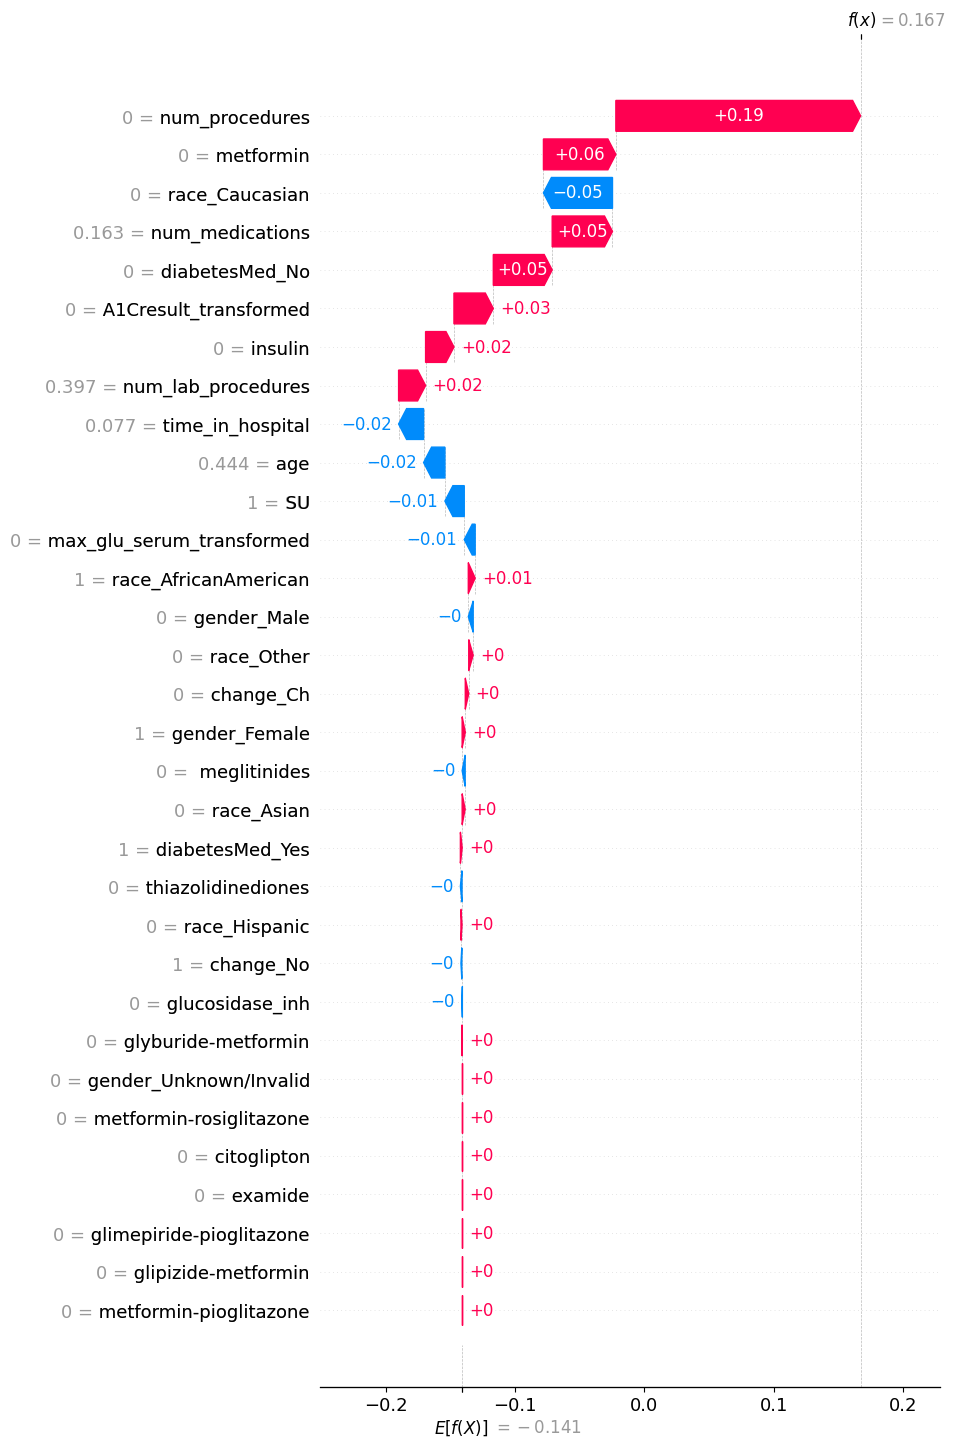

In [26]:
import shap


# Use shap.Explainer for tree-based models
explainer = shap.Explainer(HGB) 

# Calculate SHAP values for the training set 
shap_values = explainer(X_train_df)


# Plot SHAP summary plot for feature importance with descriptive feature names
shap.plots.waterfall(shap_values[0], max_display=33)

In [27]:
# Initialize SHAP
shap.initjs()
# visualize the first instance explanation with a force plot
shap.plots.force(shap_values[0])

In [28]:
# visualize the first 500 instances prediction
# stacking force plots
shap.plots.force(shap_values[:500])

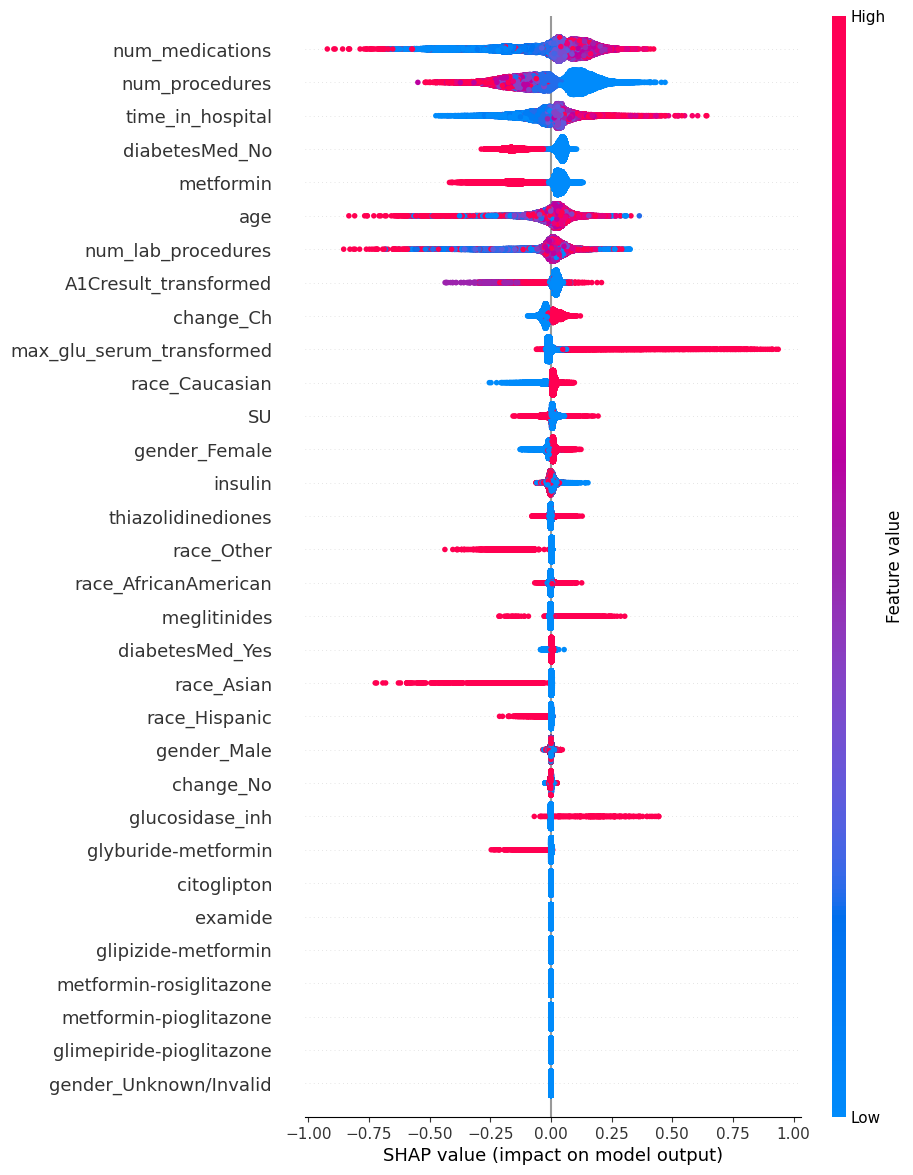

In [29]:
# summarize the effects of all the features
# the SHAP values of every feature for every sample.
shap.plots.beeswarm(shap_values, max_display=33)

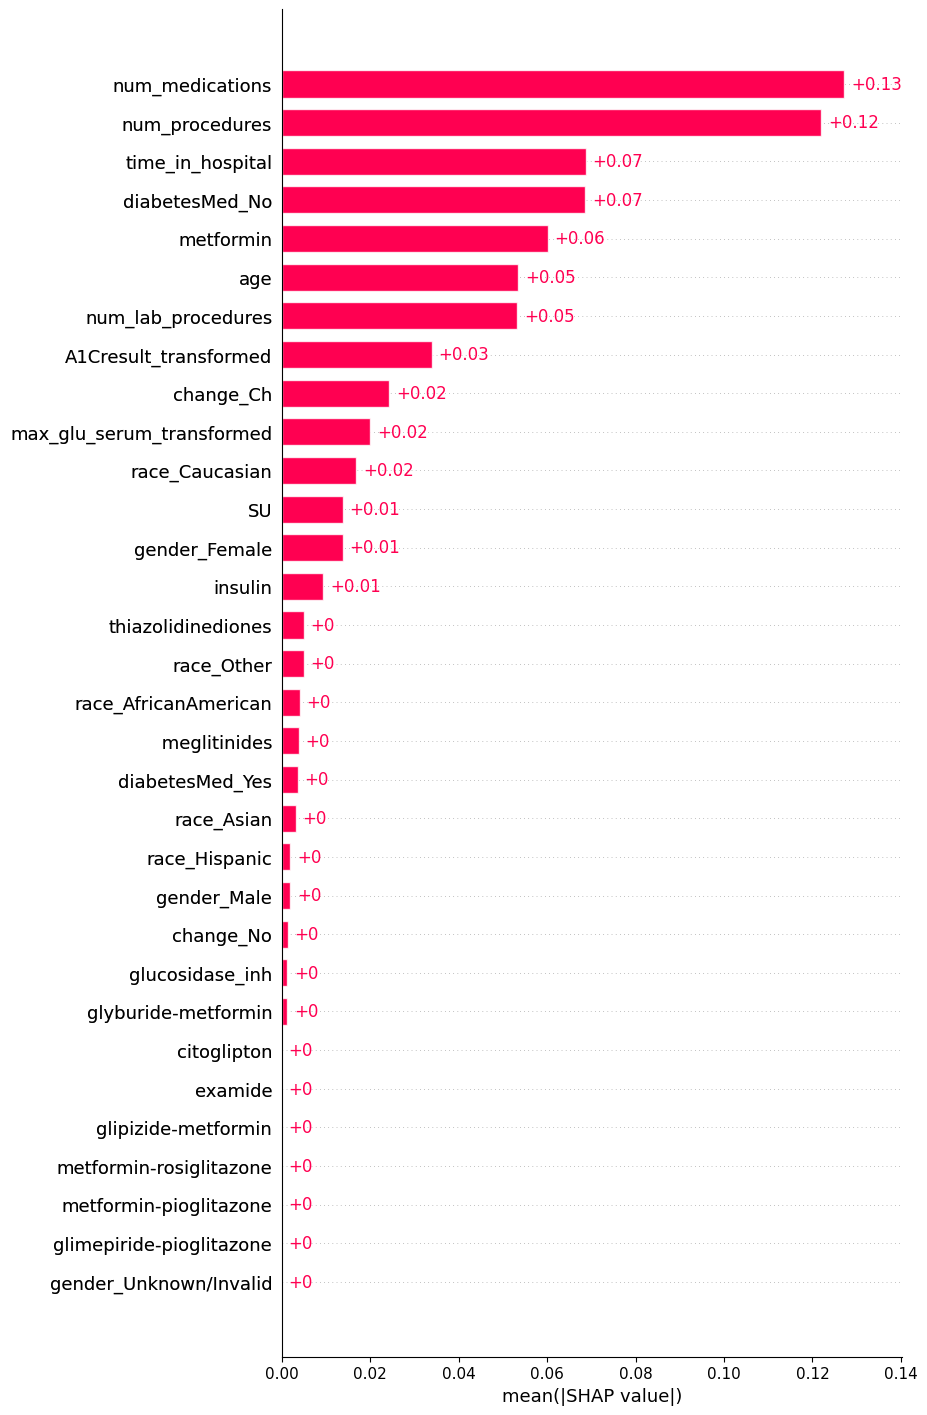

In [30]:
# mean absolute value of the SHAP values for each feature
shap.plots.bar(shap_values,max_display=33)

### Interpretation of the SHAP plots:

The plots above summarize the effects of all features for every sample in the training set. The stacked force plots show that most features push the prediction toward the negative, which might result in incorrect predictions of the readmission status. 

Additionally, the waterfall plot for the first instance showed that the number of procedures contributed most to the prediction. This contribution is most probably not the most relevant for a patient's readmission, which renders the prediction inaccurate and unuseful for healthcare professionals.

It's crucial to provide the user of the model with the corresponding prediction SHAP values. This will allow for clinical decisions to be based on factual information, especially when the model indicates that clinically irrelevant features have had a significant impact on the prediction. This is essential because the model's accuracy is poor.
